# Prediction using Supervised ML
## GRIP Internship Program
--------
### Task: 1 
### Assigned by: The Sparks Foundation
### Author: Defrino Gionaldo

### Predict the percentage of marks of the student based on the number of study hours.
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### 1. Import Python library

* `LinearRegression` module used to call Linear Regression algorithm.
* `train_test_split` module used to split data into training and testing set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 2. Import data
Import the CSV file into Python using `read_csv()` from `pandas`

In [2]:
df = pd.read_csv('D:\_PROJECT\GRIP\Task1\data.csv')

### 3. Test the general dataset
* The `head()` function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


* The `shape` funtion to get the number of rows, columns, all elements (size) of DataFrame.

In [4]:
df.shape

(25, 2)

* The `info()` function to get data information: the amount of data, data type, memory used etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* Get the statistical description of the data starting from the mean, quartile, standard deviation etc.

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* Addressing missing values in the data if there are any, if not, then you can continue to the data exploration stage.

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 4. Exploratory Data Analysis (EDA)
Perform Exploratory Data Analysis (EDA) to get to know our data better and find insights from the data.

* Univariate analysis of Hours variable

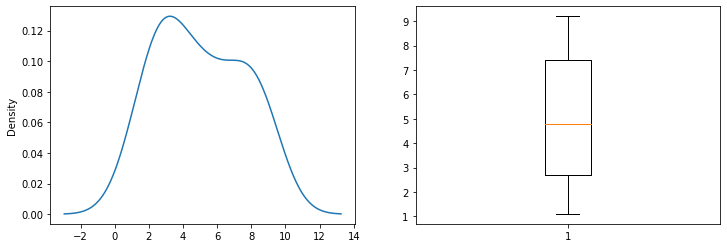

In [8]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Hours'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Hours'])
plt.show()

* Univariate analysis of Scores variable

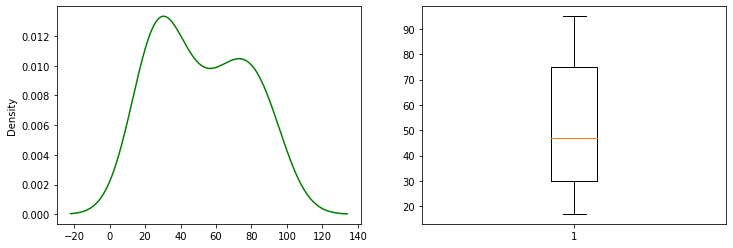

In [9]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Scores'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Scores'])
plt.show()

* Bivariate analysis of Hours and Scores

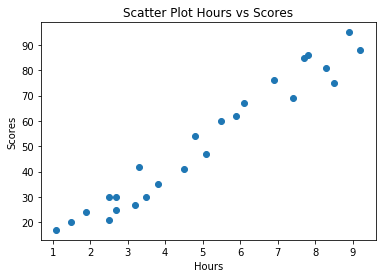

In [10]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot Hours vs Scores')
plt.show()

From the scatter plot above, it can be seen that the data has a significant positive correlation. This means that by increasing the value of the `Hour`, the `Score` value will also increase.

* Get the corellation values

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### 5. Modelling

* Assign `x` and `y` variable

In [12]:
x = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

* Split data into testing and training with size 80:20 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, random_state=0)

* Assign linear regression object

In [14]:
lin_reg = LinearRegression()

* Training the model

In [15]:
lin_reg.fit(x_train, y_train)
print("Training complete.")

Training complete.


In [16]:
print('Linear Regression Coef:',lin_reg.coef_)
print('Linear Regression Intercept:',lin_reg.intercept_)

Linear Regression Coef: [[9.91065648]]
Linear Regression Intercept: [2.01816004]


* Accuracy score from  model using the previously displayed data testing

In [17]:
lin_reg.score(x_test, y_test)

0.9454906892105356

* Visualization of Regression Line using testing data

Text(0.5, 1.0, 'Plot Hours vs Scores')

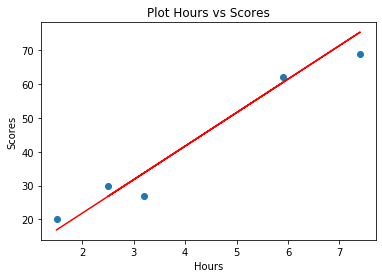

In [18]:
y_predict = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, c='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Plot Hours vs Scores')

### 6. Making Prediction
We have trained our algorithm, it's time to make some predictions. 

In [19]:
print(x_test) # Testing data - In Hours
y_pred = lin_reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
df_comp = pd.DataFrame([{'Actual': y_test, 'Predicted': y_pred}])  
df_comp 

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [21]:
print('Predicted score:',lin_reg.predict([[9.25]]))

Predicted score: [[93.69173249]]


### 7. Evaluating the model

#### Mean Absolute Error (MAE)
An error basically is the absolute difference between the actual or true values and the values that are predicted. Absolute difference means that if the result has a negative sign, it is ignored. Hence, `MAE = True values – Predicted values`. MAE takes the average of this error from every sample in a dataset and gives the output.

In [22]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975


#### R2
It is also known as the coefficient of determination. This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

In [23]:
from sklearn.metrics import r2_score
print('R2 Score:',
     r2_score(y_test, y_predict))

R2 Score: 0.9454906892105356


## The Accuracy is 94.55%
### Completed.
Thank you! :)